In [1]:
from qiskit.circuit import QuantumCircuit,ClassicalRegister, QuantumRegister, Instruction
from qiskit.quantum_info import random_statevector, Statevector

from qiskit.circuit.library.data_preparation import Initialize
from qiskit import transpile
from qiskit_aer import StatevectorSimulator
from qiskit.result import marginal_counts
from qiskit.visualization import plot_histogram
from qiskit.visualization.state_visualization import _bloch_multivector_data

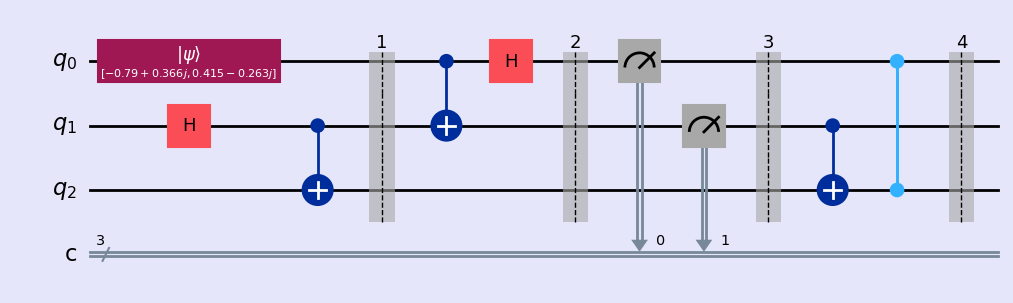

In [2]:

# teleport
def teleport(vec: Statevector):
    qc = QuantumCircuit(3,3)
    # init_gate = Initialize(vec)
    # qc.append(init_gate,[0])
    # create shared entangled pair (Phi +) for qubit 1,2
    qc.initialize(vec,0)
    qc.h(1)
    qc.cx(1,2)
    qc.barrier(label="1")

    # Bell decoding for qubit 0,1 
    qc.cx(0,1)
    qc.h(0)
    qc.barrier(label="2")
    qc.measure([0,1],[0,1])
    qc.barrier(label="3")

    qc.cx(1,2)
    qc.cz(0,2)
    qc.barrier(label="4")

    # disentangler = init_gate.gates_to_uncompute()
    # qc.append(disentangler,[2])

    # qc.measure(2,2)


    return qc

vec = random_statevector(2)
circuit_teleport = teleport(vec)
style = {'backgroundcolor': 'lavender'}
circuit_teleport.draw(output='mpl', style = style)

In [3]:
teleport_backend = StatevectorSimulator()
result = teleport_backend.run(circuit_teleport).result()


In [4]:
print(f"vec:{result.get_statevector().data}")


vec:[-0.79031875+0.36586185j -0.        +0.j         -0.        +0.j
 -0.        +0.j          0.41506554-0.26317671j  0.        -0.j
  0.        +0.j          0.        -0.j        ]


In [5]:
_bloch_multivector_data(result.get_statevector())

[[0.0, 0.0, 0.9999999999999999],
 [0.0, 0.0, 0.9999999999999999],
 [-0.8486407929195844, 0.11227369010665972, 0.5169172304176489]]

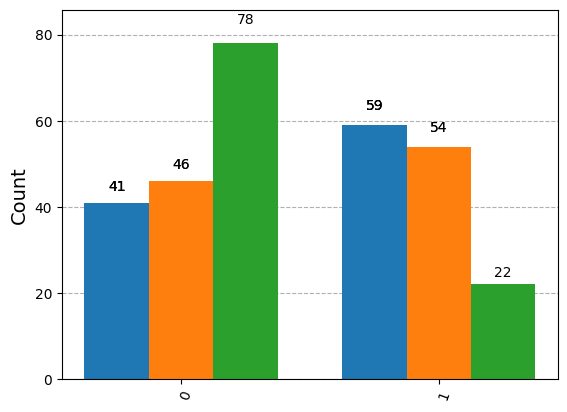

In [6]:
circuit_teleport.measure(2,2)
counts = teleport_backend.run(circuit_teleport,shots=100).result().get_counts()
qubit_counts = [marginal_counts(counts, [qubit]) for qubit in range(3)]
plot_histogram(qubit_counts)